In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [55]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS = 3
EPOCHS=50

In [56]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle= True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

Found 2152 files belonging to 3 classes.


In [9]:
len(dataset)

68

In [14]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    print(label_batch.numpy())

[[[171. 168. 177.]
  [171. 168. 177.]
  [173. 170. 179.]
  ...
  [159. 155. 169.]
  [157. 153. 167.]
  [125. 121. 135.]]

 [[173. 170. 179.]
  [173. 170. 179.]
  [173. 170. 179.]
  ...
  [130. 126. 140.]
  [165. 161. 175.]
  [151. 147. 161.]]

 [[166. 163. 172.]
  [174. 171. 180.]
  [183. 180. 189.]
  ...
  [103. 100. 111.]
  [160. 157. 168.]
  [130. 127. 138.]]

 ...

 [[187. 182. 188.]
  [185. 180. 186.]
  [187. 182. 188.]
  ...
  [161. 154. 161.]
  [168. 161. 168.]
  [139. 132. 139.]]

 [[184. 179. 185.]
  [182. 177. 183.]
  [184. 179. 185.]
  ...
  [207. 200. 207.]
  [148. 141. 148.]
  [151. 144. 151.]]

 [[185. 180. 186.]
  [182. 177. 183.]
  [184. 179. 185.]
  ...
  [134. 127. 134.]
  [153. 146. 153.]
  [143. 136. 143.]]]
[0 1 0 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0]


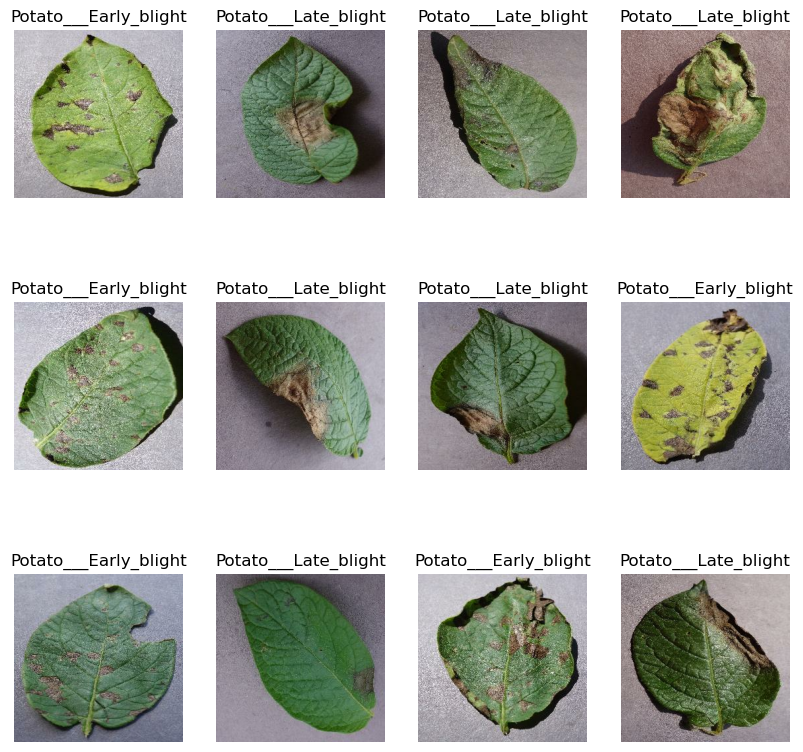

In [25]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    
    

In [26]:
len(dataset)

68

In [28]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [29]:
train_ds = dataset.take(54)
len(train_ds)

54

In [31]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [32]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [59]:
val_ds = test_ds.skip(6);
len(val_ds)

2

In [34]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [61]:
def get_dataset_partition_tf(ds,train_split=0.8, val_split=0.1,test_split=0.1,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [62]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [63]:
len(train_ds)

54

In [64]:
len(val_ds)

6

In [65]:
len(test_ds)

8

In [68]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [71]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])


In [74]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),

])